In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
#from patsy import dmatrices
from statsmodels import graphics
from resample.bootstrap import bootstrap

In [2]:
# Read train/test data
train = pd.read_csv("/titanic/train.csv")
test = pd.read_csv("/titanic/test.csv")

# Exclude messy columns
train = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Remove null / blank fields
train = train.dropna()
test = test.dropna()

In [3]:
lmod = smf.glm('Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked', data=train, family=sm.families.Binomial())
res = lmod.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      703
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -316.17
Date:                Wed, 20 May 2020   Deviance:                       632.34
Time:                        20:36:40   Pearson chi2:                     736.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.6374      0.635      8.884

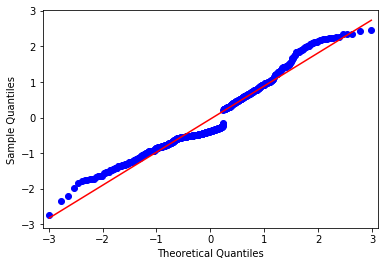

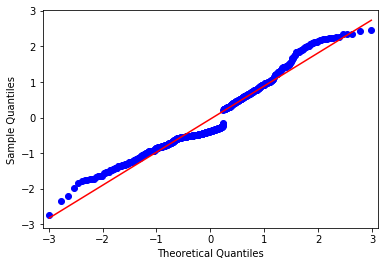

In [4]:
resid = res.resid_deviance.copy()
graphics.gofplots.qqplot(resid, line='r')

In [5]:
probs = res.predict(test)

uprobs = np.unique(probs)
n1 = np.sum(test['Survied'])

sens = np.zeros_like(uprobs)
spec = np.zeros_like(uprobs)
for i,j in enumerate(uprobs):
    sens[i] = np.sum((scores >= j) * test['Survived']) / float(n1)
    spec[i] = np.sum((scores <= j) * (1-test['Survived'])) / float(n - n1)
    
plt.plot(1 - spec, sens, '-')
plt.plot([0,1], [0,1], '-', color='grey')
plt.xlabel("1 - Specificity", size=17)
plt.ylabel("Sensitivity", size=17)

0      0.051822
1      0.320343
2      0.052305
3      0.103578
4      0.569265
         ...   
409    0.751127
411    0.855239
412    0.607251
414    0.948015
415    0.065459
Length: 331, dtype: float64


In [ ]:
def logit_bootstrap(A):
    X = A[:, 1:A.shape[1]]
    y = A[:, [0]]
    lmod = sm.GLM(y, X, family=sm.families.Binomial())
    lmod.fit(X, y)
    return {"coef": lmod.coef_, "intercept": lmod.intercept_}

#logit_boot = bootstrap(a=train.values, f=logit_bootstrap, b=2)

In [6]:
res.conf_int()

,0,1
Intercept,4.393710,6.881103
Sex[T.male],-3.074091,-2.202862
Embarked[T.Q],-1.999972,0.352882
Embarked[T.S],-0.930959,0.128532
Pclass,-1.521898,-0.876604
Age,-0.059485,-0.027215
SibSp,-0.616077,-0.110339
Parch,-0.303110,0.182570
Fare,-0.003529,0.006392
